
# Objective



To analyze the behavior of the microbial species individually and in the community. This analysis will give us insight into the extent of metabolic relationships in the community, as well as the dependence on the diet.




## Investigating effect of diet




### Selection of species:



528 AGORA bacterial species (including strains) were mapped to 412 Human Microbiome Project species. Single AGORA strains were selected where there were multiple that mapped. This resulted in a total of 412 models.

Clustering was then performed on the consumed and secreted metabolites of these 412 and the top 20 clusters were selected. A single species is selected from each cluster that secretes all 8 of the immune-related metabolites (besides spermidine which is not in the 412) present in the 412 models.

The dataset used is the Average European Diet from the AGORA dataset V1.02.

The species are:

1.  Bacteroides<sub>thetaiotaomicron</sub><sub>VPI</sub><sub>5482</sub>
2.  Bacteroides<sub>sp</sub><sub>2</sub><sub>2</sub><sub>4</sub>
3.  Parabacteroides<sub>johnsonii</sub><sub>DSM</sub><sub>18315</sub>
4.  Prevotella<sub>oralis</sub><sub>ATCC</sub><sub>33269</sub>
5.  Eubacterium<sub>eligens</sub><sub>ATCC</sub><sub>27750</sub>
6.  Slackia<sub>exigua</sub><sub>ATCC</sub><sub>700122</sub>
7.  Dorea<sub>longicatena</sub><sub>DSM</sub><sub>13814</sub>
8.  Clostridium<sub>bartlettii</sub><sub>DSM</sub><sub>16795</sub>
9.  Streptococcus<sub>sp</sub><sub>I</sub><sub>P16</sub>
10. Blautia<sub>hydrogenotrophica</sub><sub>DSM</sub><sub>10507</sub>
11. Brevundimonas<sub>bacteroides</sub><sub>DSM</sub><sub>4726</sub>
12. Clostridium<sub>hylemonae</sub><sub>DSM</sub><sub>15053</sub>
13. Sutterella<sub>wadsworthensis</sub><sub>3</sub><sub>1</sub><sub>45B</sub>
14. Enterobacteriaceae<sub>bacterium</sub><sub>9</sub><sub>2</sub><sub>54FAA</sub>
15. Bacillus<sub>megaterium</sub><sub>DSM319</sub>
16. Peptostreptococcus<sub>stomatis</sub><sub>DSM</sub><sub>17678</sub>
17. Brachybacterium<sub>paraconglomeratum</sub><sub>LC44</sub>
18. Neisseria<sub>elongata</sub><sub>subsp</sub><sub>glycolytica</sub><sub>ATCC</sub><sub>29315</sub>
19. Rothia<sub>aeria</sub><sub>F0474</sub>
20. Staphylococcus<sub>hominis</sub><sub>subsp</sub><sub>hominis</sub><sub>C80</sub>




### Diets used:



All nutrition definitions were obtained from the Virtual Metabolic Human database on 2018-04-24. They are:

1.  High Fiber Diet
2.  High Protein Diet
3.  Vegetarian Diet
4.  Vegan Diet
5.  Type 2 Diabetes Patient Diet
6.  Unhealthy Diet




## Results



Import Headers



In [3]:
%matplotlib inline
import os
import sys
import pandas as pd
RELPATH = os.getcwd()
SRCPATH = RELPATH + "/../../src/"
sys.path.append(SRCPATH)
import simulator
import matplotlib.pyplot as plt

Define file paths to bacterial species



In [1]:
SpeciesDict = {
      'sp1':{'File':'../data/average-european-diet/Bacteroides_thetaiotaomicron_VPI_5482.xml',
             'initAbundance':0.01},
      'sp2':{'File':'../data/average-european-diet/Bacteroides_sp_2_2_4.xml',
             'initAbundance':0.01},
      'sp3':{'File':'../data/average-european-diet/Parabacteroides_johnsonii_DSM_18315.xml',
             'initAbundance':0.01},
      'sp4':{'File':'../data/average-european-diet/Prevotella_oralis_ATCC_33269.xml',
             'initAbundance':0.01},
      'sp5':{'File':'../data/average-european-diet/Eubacterium_eligens_ATCC_27750.xml',
             'initAbundance':0.01},
      'sp6':{'File':'../data/average-european-diet/Slackia_exigua_ATCC_700122.xml',
             'initAbundance':0.01},
      'sp7':{'File':'../data/average-european-diet/Dorea_longicatena_DSM_13814.xml',
             'initAbundance':0.01},
      'sp8':{'File':'../data/average-european-diet/Clostridium_bartlettii_DSM_16795.xml',
             'initAbundance':0.01},
      'sp9':{'File':'../data/average-european-diet/Streptococcus_sp_I_P16.xml',
             'initAbundance':0.01},
      'sp10':{'File':'../data/average-european-diet/Blautia_hydrogenotrophica_DSM_10507.xml',
              'initAbundance':0.01},
      'sp11':{'File':'../data/average-european-diet/Brevundimonas_bacteroides_DSM_4726.xml',
              'initAbundance':0.01},
      'sp12':{'File':'../data/average-european-diet/Clostridium_hylemonae_DSM_15053.xml',
              'initAbundance':0.01},
      'sp13':{'File':'../data/average-european-diet/Sutterella_wadsworthensis_3_1_45B.xml',
              'initAbundance':0.01},
      'sp14':{'File':'../data/average-european-diet/Enterobacteriaceae_bacterium_9_2_54FAA.xml',
              'initAbundance':0.01},
#       'sp15':{'File':'../data/average-european-diet/Bacillus_megaterium_DSM319.xml',
#               'initAbundance':0.01},
      'sp16':{'File':'../data/average-european-diet/Peptostreptococcus_stomatis_DSM_17678.xml',
              'initAbundance':0.01},
      'sp17':{'File':'../data/average-european-diet/Brachybacterium_paraconglomeratum_LC44.xml',
              'initAbundance':0.01},
      'sp18':{'File':'../data/average-european-diet/Neisseria_elongata_subsp_glycolytica_ATCC_29315.xml',
              'initAbundance':0.01},
      'sp19':{'File':'../data/average-european-diet/Rothia_aeria_F0474.xml',
              'initAbundance':0.01},
      'sp20':{'File':'../data/average-european-diet/Staphylococcus_hominis_subsp_hominis_C80.xml',
              'initAbundance':0.01}
}

Define file paths to diet definitions



In [2]:
DietDict = {
    'HighFiber': '../data/diet-definitions/VMH_HighFiber.tsv',
    'HighProtein': '../data/diet-definitions/VMH_HighProtein.tsv',
    'Vegetarian': '../data/diet-definitions/VMH_Vegetarian.tsv',
    'Vegan': '../data/diet-definitions/VMH_Vegan.tsv',
    'Type2Diabetes': '../data/diet-definitions/VMH_Type2Diabetes.tsv',
    'Unhealthy': '../data/diet-definitions/VMH_Unhealthy.tsv'
    }


### Species responses to diets



Define function to plot biomass trajectory of single species community



In [4]:
def characterizeSingleSpecies(SingleSpeciesDict, DietDict):
    plt.figure()
    sp_id = SingleSpeciesDict.keys()[0]
    for diet in DietDict.keys():
        DietDF = pd.read_csv(RELPATH +'/' + DietDict[diet], sep='\t')
        Output, SpecDict, Definition = simulator.simulateCommunity(SingleSpeciesDict, DietDF, MaxIter=20, cobraonly=True)
        T = []
        Biomass = []
        for P in Output:
            T += list(P['t'])
            Biomass += list(P[SpecDict[sp_id]['Name']])
        plt.plot(T, Biomass, label=diet)
    plt.legend()
    plt.title(SingleSpeciesDict[sp_id]['Name'])
    plt.xlabel('min')
    plt.ylabel('gdw')
    plt.savefig('./figs/' + SingleSpeciesDict[sp_id]['Name'] + '.png', dpi=300)

Simulate single speciess



Defining Dynamical model... 


Reading species sp8
('sp8', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
4 180.0
5 240.0
6 300.0
7 360.0
8 420.0
9 480.0
10 540.0
11 600.0
12 660.0
13 720.0
14 780.0
	EX_asn_L__40__e__41__is 0 at 803.993999
15 803.983997333
16 804.983997333
17 864.983997333
18 924.983997333
19 984.983997333
20 1044.98399733
This took 54.11016s
		STATISTICS
Variables		155
Parameters		202
Defining Dynamical model... 


Reading species sp8
('sp8', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
4 180.0
5 240.0
6 300.0
7 360.0
8 420.0
9 480.0
10 540.0
11 600.0
12 660.0
13 720.0
14 780.0
	EX_asn_L__40__e__41__is 0 at 813.895649275
15 813.885647608
16 814.885647608
17 874.885647608
18 934.885647608
19 994.885647608
20 1054.88564761
This took 53.626243s
		STATISTICS
Variables		155
Parameters		202
Defining Dynamical model... 


Reading species sp8
('sp8', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
4 180.0
5 240.0
6 300.0
7 360.0
8 420.0
9 480.0
10 540.0
11 600.0
12 660.0


('sp11', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
4 180.0
5 240.0
6 300.0
7 360.0
8 420.0
9 480.0
10 540.0
11 600.0
12 660.0
	EX_asn_L__40__e__41__is 0 at 713.428904817
13 713.418903151
14 714.418903151
15 774.418903151
16 834.418903151
17 894.418903151
18 954.418903151
19 1014.41890315
20 1074.41890315
This took 47.006037s
		STATISTICS
Variables		139
Parameters		182
Defining Dynamical model... 


Reading species sp11
('sp11', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
4 180.0
5 240.0
6 300.0
7 360.0
8 420.0
9 480.0
10 540.0
11 600.0
12 660.0
	EX_asn_L__40__e__41__is 0 at 713.428904817
13 713.418903151
14 714.418903151
15 774.418903151
16 834.418903151
17 894.418903151
18 954.418903151
19 1014.41890315
20 1074.41890315
This took 46.557281s
		STATISTICS
Variables		139
Parameters		182
Defining Dynamical model... 


Reading species sp11
('sp11', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
4 180.0
5 240.0
6 300.0
7 360.0
8 420.0
9 480.0
10 540.0
11 600.0
12 660.0
	EX_asn_L_

17 850.891648608
18 910.891648608
	EX_thr_L__40__e__41__is 0 at 958.429571595
19 958.419569928
20 959.419569928
	EX_gln_L__40__e__41__is 0 at 962.580096683
This took 45.594708s
		STATISTICS
Variables		139
Parameters		182
Defining Dynamical model... 


Reading species sp1
('sp1', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
4 180.0
5 240.0
6 300.0
7 360.0
8 420.0
9 480.0
10 540.0
11 600.0
12 660.0
13 720.0
14 780.0
	EX_asn_L__40__e__41__is 0 at 815.735955993
15 815.725954326
16 816.725954326
17 876.725954326
18 936.725954326
19 996.725954326
20 1056.72595433
This took 86.860412s
		STATISTICS
Variables		218
Parameters		258
Defining Dynamical model... 


Reading species sp1
('sp1', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
4 180.0
5 240.0
6 300.0
7 360.0
8 420.0
9 480.0
10 540.0
11 600.0
12 660.0
13 720.0
14 780.0
15 840.0
16 900.0
17 960.0
18 1020.0
19 1080.0
20 1140.0
This took 87.972378s
		STATISTICS
Variables		218
Parameters		258
Defining Dynamical model... 


Reading species

16 785.340723454
17 845.340723454
18 905.340723454
19 965.340723454
20 1025.34072345
This took 36.829917s
		STATISTICS
Variables		117
Parameters		160
Defining Dynamical model... 


Reading species sp4
('sp4', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
4 180.0
5 240.0
6 300.0
7 360.0
8 420.0
9 480.0
	EX_gln_L__40__e__41__is 0 at 482.16036006
10 482.150358393
11 483.150358393
12 543.150358393
13 603.150358393
14 663.150358393
15 723.150358393
16 783.150358393
17 843.150358393
18 903.150358393
19 963.150358393
20 1023.15035839
This took 37.376627s
		STATISTICS
Variables		117
Parameters		160
Defining Dynamical model... 


Reading species sp4
('sp4', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
4 180.0
5 240.0
6 300.0
7 360.0
8 420.0
9 480.0
10 540.0
	EX_gln_L__40__e__41__is 0 at 544.350725121
11 544.340723454
12 545.340723454
13 605.340723454
14 665.340723454
15 725.340723454
16 785.340723454
17 845.340723454
18 905.340723454
19 965.340723454
20 1025.34072345
This took 37.698336s
	

20 1140.0
This took 38.976758s
		STATISTICS
Variables		118
Parameters		155
Defining Dynamical model... 


Reading species sp7
('sp7', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
4 180.0
5 240.0
6 300.0
7 360.0
8 420.0
9 480.0
10 540.0
11 600.0
12 660.0
13 720.0
14 780.0
15 840.0
16 900.0
17 960.0
18 1020.0
19 1080.0
20 1140.0
This took 37.947633s
		STATISTICS
Variables		118
Parameters		155
Defining Dynamical model... 


Reading species sp19
('sp19', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
4 180.0
5 240.0
6 300.0
7 360.0
8 420.0
9 480.0
10 540.0
11 600.0
12 660.0
13 720.0
14 780.0
15 840.0
16 900.0
17 960.0
18 1020.0
19 1080.0
20 1140.0
This took 42.615066s
		STATISTICS
Variables		128
Parameters		173
Defining Dynamical model... 


Reading species sp19
('sp19', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
4 180.0
5 240.0
6 300.0
7 360.0
8 420.0
9 480.0
10 540.0
11 600.0
12 660.0
13 720.0
14 780.0
15 840.0
16 900.0
17 960.0
18 1020.0
19 1080.0
20 1140.0
This took 43.154283s

19 983.963827305
20 1043.9638273
This took 41.093891s
		STATISTICS
Variables		125
Parameters		164
Defining Dynamical model... 


Reading species sp13
('sp13', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
	EX_asn_L__40__e__41__is 0 at 142.963827305
4 142.953825638
5 143.953825638
6 203.953825638
7 263.953825638
8 323.953825638
9 383.953825638
10 443.953825638
11 503.953825638
12 563.953825638
13 623.953825638
14 683.953825638
15 743.953825638
16 803.953825638
17 863.953825638
18 923.953825638
19 983.953825638
20 1043.95382564
This took 40.929462s
		STATISTICS
Variables		125
Parameters		164
Defining Dynamical model... 


Reading species sp13
('sp13', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
3 120.0
	EX_asn_L__40__e__41__is 0 at 142.963827305
4 142.953825638
5 143.953825638
6 203.953825638
7 263.953825638
8 323.953825638
9 383.953825638
10 443.953825638
11 503.953825638
12 563.953825638
13 623.953825638
14 683.953825638
15 743.953825638
16 803.953825638
17 863.953825638
18 923.953825638

13 571.084847475
14 631.084847475
15 691.084847475
16 751.084847475
17 811.084847475
18 871.084847475
19 931.084847475
20 991.084847475
This took 71.115605s
		STATISTICS
Variables		196
Parameters		248
Defining Dynamical model... 


Reading species sp15
('sp15', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
	EX_asn_L__40__e__41__is 0 at 107.987998
3 107.977996333
4 108.977996333
5 168.977996333
6 228.977996333
7 288.977996333
8 348.977996333
9 408.977996333
10 468.977996333
11 528.977996333
12 588.977996333
13 648.977996333
14 708.977996333
15 768.977996333
16 828.977996333
17 888.977996333
18 948.977996333
19 1008.97799633
20 1068.97799633
This took 73.544886s
		STATISTICS
Variables		196
Parameters		248
Defining Dynamical model... 


Reading species sp15
('sp15', 'EX_h2o__40__e__41__')
Done!
1 0
2 60.0
	EX_asn_L__40__e__41__is 0 at 107.987998
3 107.977996333
4 108.977996333
5 168.977996333
6 228.977996333
7 288.977996333
8 348.977996333
9 408.977996333
10 468.977996333
11 528.977996333
12 58

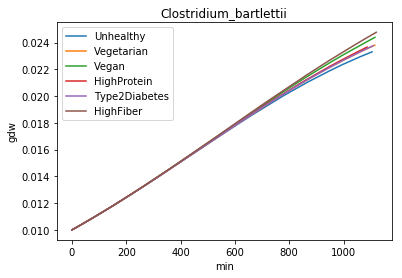

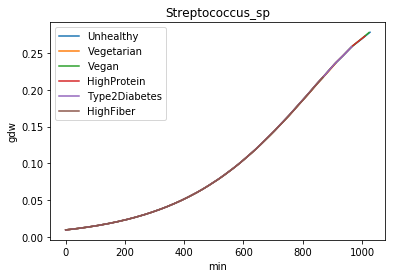

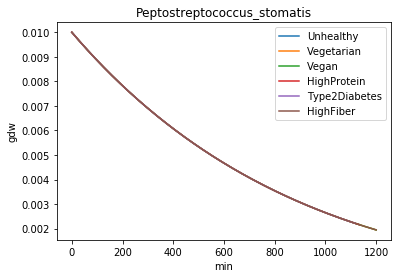

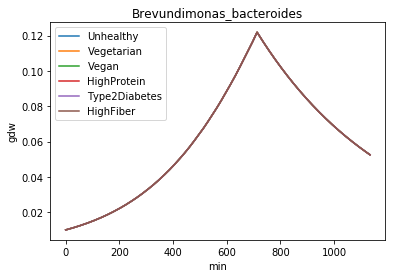

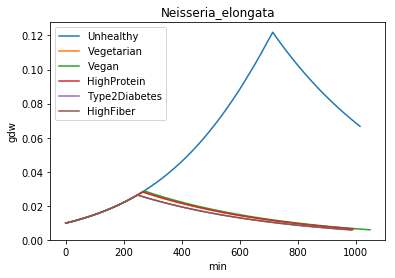

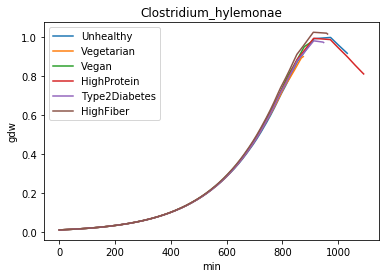

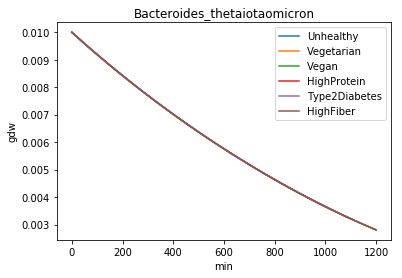

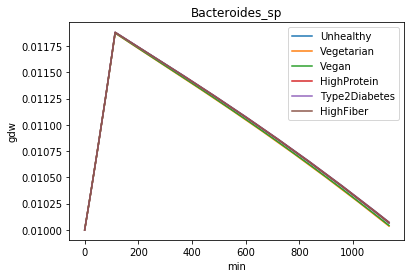

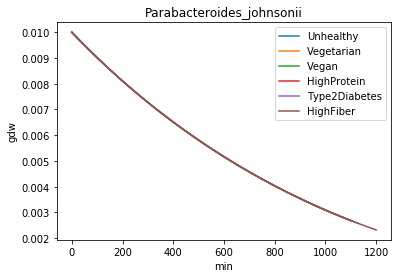

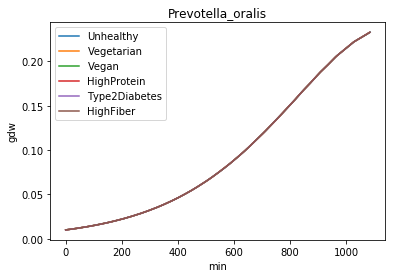

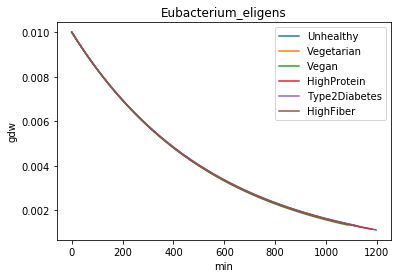

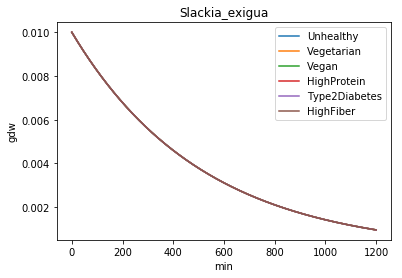

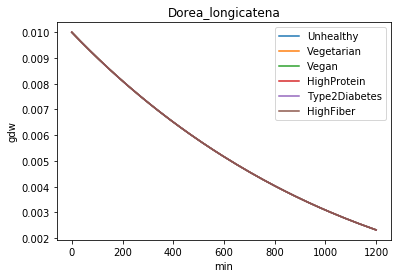

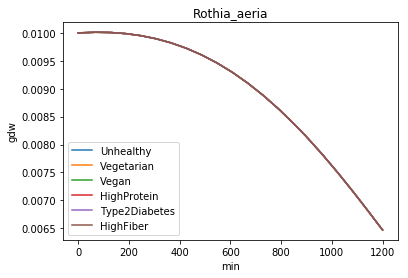

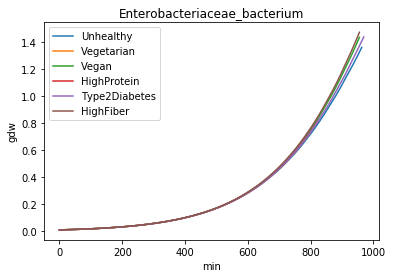

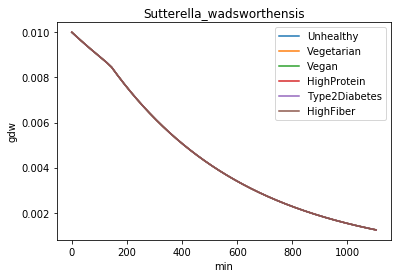

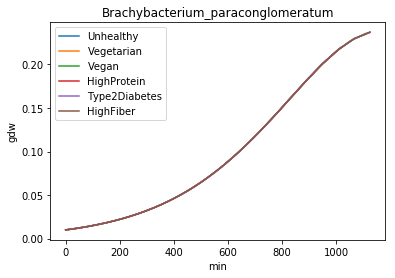

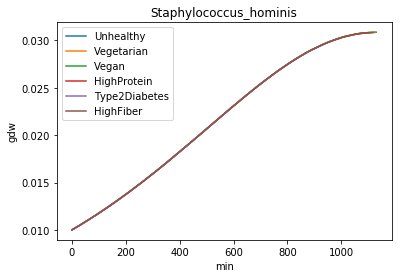

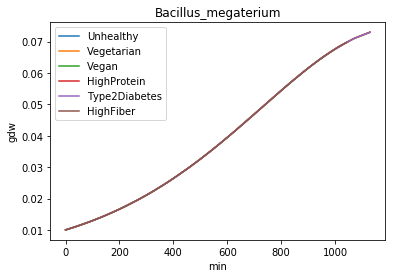

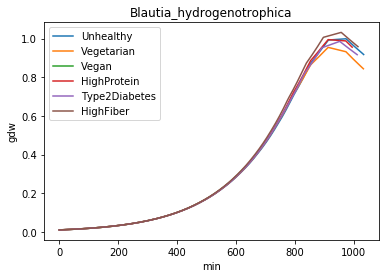

In [5]:
for sp in SpeciesDict.keys():
    # plt.figure()
    characterizeSingleSpecies({sp:SpeciesDict[sp]}, DietDict)


### Community responses to diets



1.  High Fiber Diet



Defining Dynamical model... 


Reading species sp8

Reading species sp9

Reading species sp16

Reading species sp11

Reading species sp18

Reading species sp12

Reading species sp1

Reading species sp2

Reading species sp3

Reading species sp4

Reading species sp5

Reading species sp6

Reading species sp7

Reading species sp19

Reading species sp14

Reading species sp13

Reading species sp17

Reading species sp20

Reading species sp15

Reading species sp10
('sp8', 'EX_h2o__40__e__41__')
('sp9', 'EX_h2o__40__e__41__')
('sp16', 'EX_h2o__40__e__41__')
('sp11', 'EX_h2o__40__e__41__')
('sp18', 'EX_h2o__40__e__41__')
('sp12', 'EX_h2o__40__e__41__')
('sp1', 'EX_h2o__40__e__41__')
('sp2', 'EX_h2o__40__e__41__')
('sp3', 'EX_h2o__40__e__41__')
('sp4', 'EX_h2o__40__e__41__')
('sp5', 'EX_h2o__40__e__41__')
('sp6', 'EX_h2o__40__e__41__')
('sp7', 'EX_h2o__40__e__41__')
('sp19', 'EX_h2o__40__e__41__')
('sp14', 'EX_h2o__40__e__41__')
('sp13', 'EX_h2o__40__e__41__')
('sp17', 'EX_h2o__40__e__41__')
('sp

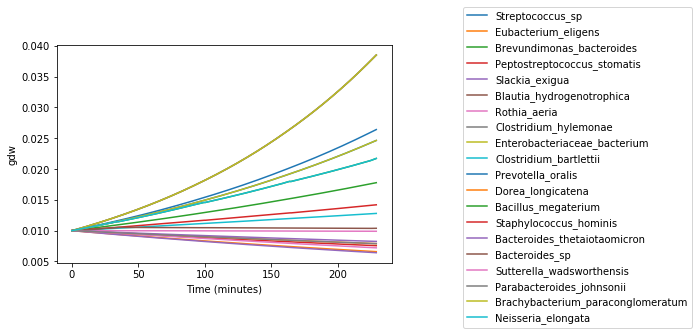

In [ ]:
HighFiberDiet = pd.read_csv(RELPATH +'/' + DietDict['HighFiber'], sep='\t')
Output, HighFibSpecDict, Definition = simulator.simulateCommunity(SpeciesDict, HighFiberDiet, MaxIter=10, cobraonly=True)
simulator.plotBiomass(HighFibSpecDict, Output)

1.  High Protein Diet



Defining Dynamical model... 


Reading species sp8

Reading species sp9

Reading species sp16

Reading species sp11

Reading species sp18

Reading species sp12

Reading species sp1

Reading species sp2

Reading species sp3

Reading species sp4

Reading species sp5

Reading species sp6

Reading species sp7

Reading species sp19

Reading species sp14

Reading species sp13

Reading species sp17

Reading species sp20

Reading species sp10
('sp8', 'EX_h2o__40__e__41__')
('sp9', 'EX_h2o__40__e__41__')
('sp16', 'EX_h2o__40__e__41__')
('sp11', 'EX_h2o__40__e__41__')
('sp18', 'EX_h2o__40__e__41__')
('sp12', 'EX_h2o__40__e__41__')
('sp1', 'EX_h2o__40__e__41__')
('sp2', 'EX_h2o__40__e__41__')
('sp3', 'EX_h2o__40__e__41__')
('sp4', 'EX_h2o__40__e__41__')
('sp5', 'EX_h2o__40__e__41__')
('sp6', 'EX_h2o__40__e__41__')
('sp7', 'EX_h2o__40__e__41__')
('sp19', 'EX_h2o__40__e__41__')
('sp14', 'EX_h2o__40__e__41__')
('sp13', 'EX_h2o__40__e__41__')
('sp17', 'EX_h2o__40__e__41__')
('sp20', 'EX_h2o__40__e__4

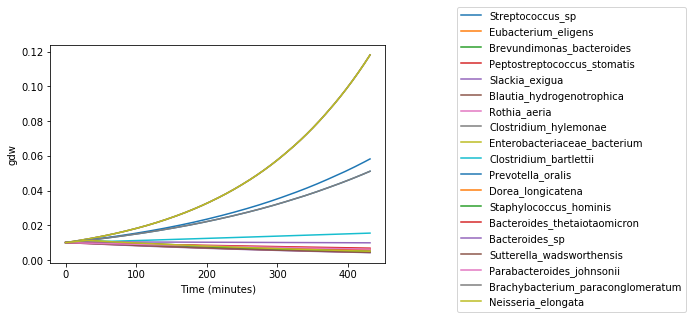

In [4]:
HighProteinDiet = pd.read_csv(RELPATH +'/' + DietDict['HighProtein'], sep='\t')
Output, HighProteinSpecDict, Definition = simulator.simulateCommunity(SpeciesDict, HighProteinDiet, MaxIter=10, cobraonly=True)
simulator.plotBiomass(HighProteinSpecDict, Output)

1.  Vegetarian Diet



Defining Dynamical model... 


Reading species sp8

Reading species sp9

Reading species sp16

Reading species sp11

Reading species sp18

Reading species sp12

Reading species sp1

Reading species sp2

Reading species sp3

Reading species sp4

Reading species sp5

Reading species sp6

Reading species sp7

Reading species sp19

Reading species sp14

Reading species sp13

Reading species sp17

Reading species sp20

Reading species sp10
('sp8', 'EX_h2o__40__e__41__')
('sp9', 'EX_h2o__40__e__41__')
('sp16', 'EX_h2o__40__e__41__')
('sp11', 'EX_h2o__40__e__41__')
('sp18', 'EX_h2o__40__e__41__')
('sp12', 'EX_h2o__40__e__41__')
('sp1', 'EX_h2o__40__e__41__')
('sp2', 'EX_h2o__40__e__41__')
('sp3', 'EX_h2o__40__e__41__')
('sp4', 'EX_h2o__40__e__41__')
('sp5', 'EX_h2o__40__e__41__')
('sp6', 'EX_h2o__40__e__41__')
('sp7', 'EX_h2o__40__e__41__')
('sp19', 'EX_h2o__40__e__41__')
('sp14', 'EX_h2o__40__e__41__')
('sp13', 'EX_h2o__40__e__41__')
('sp17', 'EX_h2o__40__e__41__')
('sp20', 'EX_h2o__40__e__4

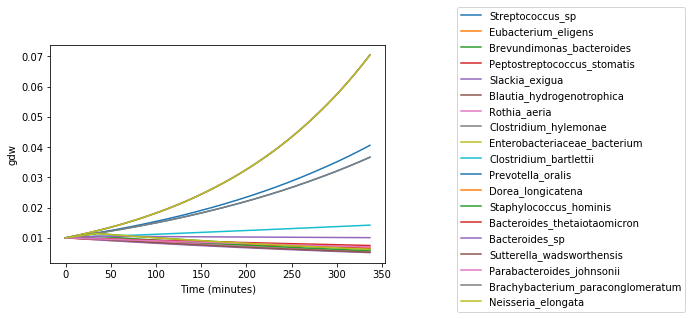

In [4]:
VegetarianDiet = pd.read_csv(RELPATH +'/' + DietDict['Vegetarian'], sep='\t')
Output, VegetarianSpecDict, Definition = simulator.simulateCommunity(SpeciesDict, VegetarianDiet, MaxIter=10, cobraonly=True)
simulator.plotBiomass(VegetarianSpecDict, Output)

1.  Vegan Diet



Defining Dynamical model... 


Reading species sp8

Reading species sp9

Reading species sp16

Reading species sp11

Reading species sp18

Reading species sp12

Reading species sp1

Reading species sp2

Reading species sp3

Reading species sp4

Reading species sp5

Reading species sp6

Reading species sp7

Reading species sp19

Reading species sp14

Reading species sp13

Reading species sp17

Reading species sp20

Reading species sp10
('sp8', 'EX_h2o__40__e__41__')
('sp9', 'EX_h2o__40__e__41__')
('sp16', 'EX_h2o__40__e__41__')
('sp11', 'EX_h2o__40__e__41__')
('sp18', 'EX_h2o__40__e__41__')
('sp12', 'EX_h2o__40__e__41__')
('sp1', 'EX_h2o__40__e__41__')
('sp2', 'EX_h2o__40__e__41__')
('sp3', 'EX_h2o__40__e__41__')
('sp4', 'EX_h2o__40__e__41__')
('sp5', 'EX_h2o__40__e__41__')
('sp6', 'EX_h2o__40__e__41__')
('sp7', 'EX_h2o__40__e__41__')
('sp19', 'EX_h2o__40__e__41__')
('sp14', 'EX_h2o__40__e__41__')
('sp13', 'EX_h2o__40__e__41__')
('sp17', 'EX_h2o__40__e__41__')
('sp20', 'EX_h2o__40__e__4

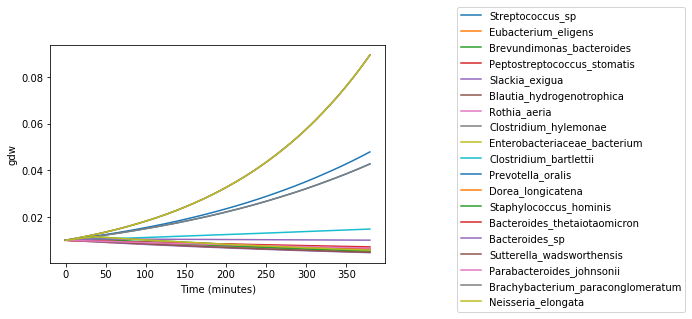

In [4]:
VeganDiet = pd.read_csv(RELPATH +'/' + DietDict['Vegan'], sep='\t')
Output, VeganSpecDict, Definition = simulator.simulateCommunity(SpeciesDict, VeganDiet, MaxIter=10, cobraonly=True)
simulator.plotBiomass(VeganSpecDict, Output)

1.  Type 2 Diabetes Patient Diet



Defining Dynamical model... 


Reading species sp8

Reading species sp9

Reading species sp16

Reading species sp11

Reading species sp18

Reading species sp12

Reading species sp1

Reading species sp2

Reading species sp3

Reading species sp4

Reading species sp5

Reading species sp6

Reading species sp7

Reading species sp19

Reading species sp14

Reading species sp13

Reading species sp17

Reading species sp20

Reading species sp10
('sp8', 'EX_h2o__40__e__41__')
('sp9', 'EX_h2o__40__e__41__')
('sp16', 'EX_h2o__40__e__41__')
('sp11', 'EX_h2o__40__e__41__')
('sp18', 'EX_h2o__40__e__41__')
('sp12', 'EX_h2o__40__e__41__')
('sp1', 'EX_h2o__40__e__41__')
('sp2', 'EX_h2o__40__e__41__')
('sp3', 'EX_h2o__40__e__41__')
('sp4', 'EX_h2o__40__e__41__')
('sp5', 'EX_h2o__40__e__41__')
('sp6', 'EX_h2o__40__e__41__')
('sp7', 'EX_h2o__40__e__41__')
('sp19', 'EX_h2o__40__e__41__')
('sp14', 'EX_h2o__40__e__41__')
('sp13', 'EX_h2o__40__e__41__')
('sp17', 'EX_h2o__40__e__41__')
('sp20', 'EX_h2o__40__e__4

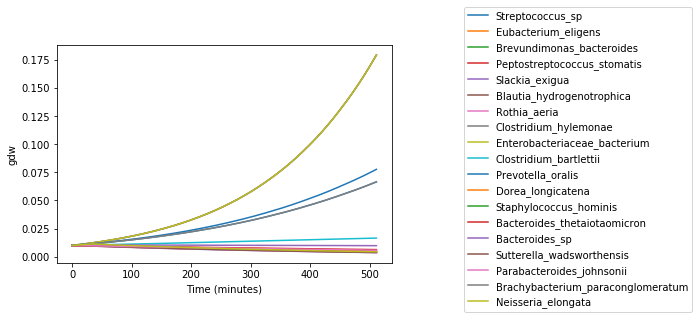

In [4]:
Type2DiabetesDiet = pd.read_csv(RELPATH +'/' + DietDict['Type2Diabetes'], sep='\t')
Output, T2DSpecDict, Definition = simulator.simulateCommunity(SpeciesDict, Type2DiabetesDiet, MaxIter=10, cobraonly=True)
simulator.plotBiomass(T2DSpecDict, Output)

1.  Unhealthy Diet



Defining Dynamical model... 


Reading species sp8

Reading species sp9

Reading species sp16

Reading species sp11

Reading species sp18

Reading species sp12

Reading species sp1

Reading species sp2

Reading species sp3

Reading species sp4

Reading species sp5

Reading species sp6

Reading species sp7

Reading species sp19

Reading species sp14

Reading species sp13

Reading species sp17

Reading species sp20

Reading species sp10
('sp8', 'EX_h2o__40__e__41__')
('sp9', 'EX_h2o__40__e__41__')
('sp16', 'EX_h2o__40__e__41__')
('sp11', 'EX_h2o__40__e__41__')
('sp18', 'EX_h2o__40__e__41__')
('sp12', 'EX_h2o__40__e__41__')
('sp1', 'EX_h2o__40__e__41__')
('sp2', 'EX_h2o__40__e__41__')
('sp3', 'EX_h2o__40__e__41__')
('sp4', 'EX_h2o__40__e__41__')
('sp5', 'EX_h2o__40__e__41__')
('sp6', 'EX_h2o__40__e__41__')
('sp7', 'EX_h2o__40__e__41__')
('sp19', 'EX_h2o__40__e__41__')
('sp14', 'EX_h2o__40__e__41__')
('sp13', 'EX_h2o__40__e__41__')
('sp17', 'EX_h2o__40__e__41__')
('sp20', 'EX_h2o__40__e__4

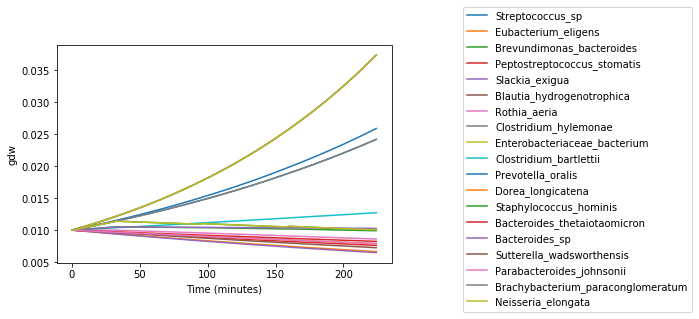

In [5]:
UnhealthyDiet = pd.read_csv(RELPATH +'/' + DietDict['Unhealthy'], sep='\t')
Output, UnhealthySpecDict, Definition = simulator.simulateCommunity(SpeciesDict, UnhealthyDiet, MaxIter=10, cobraonly=True)
simulator.plotBiomass(UnhealthySpecDict, Output)